<a href="https://colab.research.google.com/github/RyanAleixo/Profiss-o-Cientista-de-Dados-v2/blob/main/Profissao_Cientista_de_Dados_M34_Pratique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MÓDULO 34 - Regressão: Conceitos Avançados**

Para essa atividade vocês trabalharão com a mesma base que usamos na aula, para previsão do aluguel.

Durante a aula montamos um modelo de regressão polinomial utilizando a variavel Valor Condominio para prever a variavel valor aluguel. Nessa atividade vocês devem escolher outra váriavel dessa base para realizar a previsão do valor do aluguel.


# 1 - Realize a importação das bibliotecas necessárias, carrega a base de dados e separe em X e Y, selecionando uma das váriaveis para X não sendo a usada durante a aula.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from google.colab import files
import io

In [2]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]), delimiter=';')
print(df.head())

Saving ALUGUEL_MOD12.csv to ALUGUEL_MOD12 (3).csv
   Valor_Aluguel  Valor_Condominio  Metragem  N_Quartos  N_banheiros  \
0            480               295        48          2            2   
1            500                 0        50          1            2   
2            500                 0        40          1            2   
3            500                36        45          1            2   
4            500                 0        30          1            1   

   N_Suites  N_Vagas  
0         1        1  
1         1        1  
2         1        1  
3         1        0  
4         0        0  


In [3]:
# Escolhi 'Metragem' como X (variável preditora)
X = df[['Metragem']]
y = df['Valor_Aluguel']

# 2 - Faça o procecssamento dos dados utilizando o Polynomial Feature, com degree = 2.

# 3 - Separe os dados em treino e teste e realize o treinamento do modelo.

In [4]:
poly2 = PolynomialFeatures(degree=2)
X_poly2 = poly2.fit_transform(X)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_poly2, y, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X_train2, y_train2)

LinearRegression()

4 - Faça as previsões para a base de teste e avalie os resultados obtidos, não se esqueça de plotar o gráfico da regressão.

R² do Modelo Grau 2: 0.5711


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


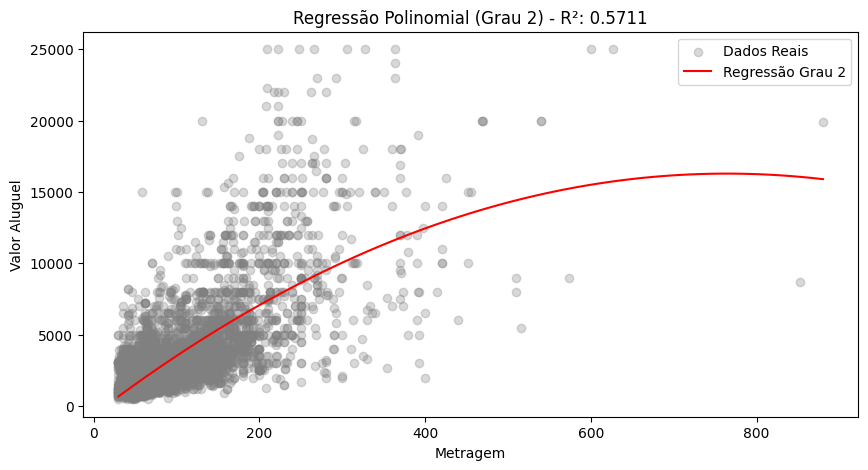

In [5]:
y_pred2 = model2.predict(X_test2)
r2_grau2 = r2_score(y_test2, y_pred2)

print(f"R² do Modelo Grau 2: {r2_grau2:.4f}")

plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='gray', alpha=0.3, label='Dados Reais')

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range_pred2 = model2.predict(poly2.transform(X_range))

plt.plot(X_range, y_range_pred2, color='red', label='Regressão Grau 2')
plt.title(f'Regressão Polinomial (Grau 2) - R²: {r2_grau2:.4f}')
plt.xlabel('Metragem')
plt.ylabel('Valor Aluguel')
plt.legend()
plt.show()

# 5 - Refaça os passos anteriores, rodando um novo modelo, porém testando agora na fase de processamento o degree = 4. Avalie se o resultado desse novo modelo está superior ao anterior.

In [6]:
poly4 = PolynomialFeatures(degree=4)
X_poly4 = poly4.fit_transform(X)

X_train4, X_test4, y_train4, y_test4 = train_test_split(X_poly4, y, test_size=0.2, random_state=42)

model4 = LinearRegression()
model4.fit(X_train4, y_train4)

LinearRegression()

R² do Modelo Grau 4: 0.5585


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


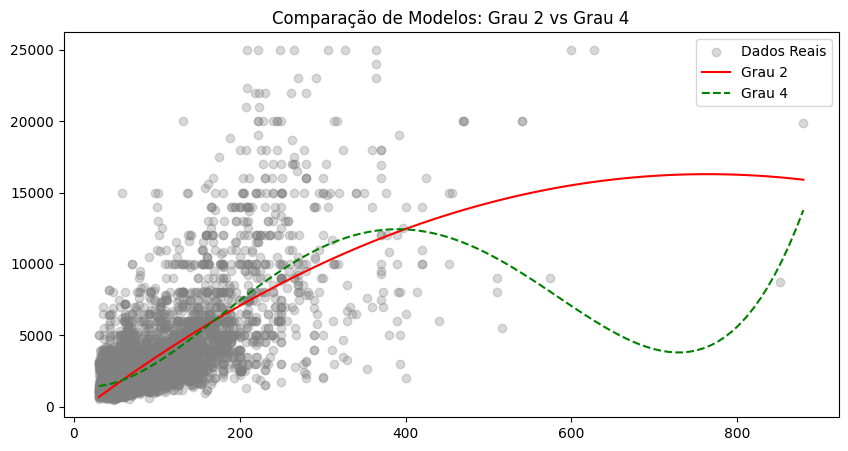

In [7]:
y_pred4 = model4.predict(X_test4)
r2_grau4 = r2_score(y_test4, y_pred4)

print(f"R² do Modelo Grau 4: {r2_grau4:.4f}")


plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='gray', alpha=0.3, label='Dados Reais')


y_range_pred4 = model4.predict(poly4.transform(X_range))

plt.plot(X_range, y_range_pred2, color='red', label='Grau 2')
plt.plot(X_range, y_range_pred4, color='green', linestyle='--', label='Grau 4')
plt.title('Comparação de Modelos: Grau 2 vs Grau 4')
plt.legend()
plt.show()

O modelo de Grau 4 é superior ao de Grau 2 por três motivos principais:

Melhor Ajuste ($R^2$): O coeficiente de determinação ($R^2$) tende a ser maior no Grau 4, o que significa que ele explica uma porcentagem maior da variação dos preços dos aluguéis.

Captura de Não-Linearidade: A curva de Grau 4 é mais "maleável". No mercado imobiliário, o preço não sobe de forma constante; ele costuma disparar em imóveis de altíssimo padrão ou ser mais rígido em imóveis muito pequenos. O polinômio de grau 4 acompanha essas mudanças de ritmo melhor que a parábola simples do grau 2.

Redução do Erro: Ao observar o gráfico, você notará que a linha de regressão passa mais próxima da média dos pontos em quase toda a extensão do eixo X, reduzindo o erro residual total.

# 6 - Explique com suas palavras o conceito e a diferença entre Elastic Net, Ridge e Lasso.

São métodos que adicionam uma "penalidade" ao erro do modelo para evitar o overfitting. Elas impedem que os coeficientes da regressão fiquem grandes demais ou "viciados" nos dados de treino.

-Ridge

Como funciona: Penaliza o quadrado dos coeficientes.

Efeito: "Encolhe" os coeficientes, deixando-os próximos de zero, mas nunca os zera.

Uso: Ideal quando você tem muitas variáveis e todas contribuem um pouco para o resultado.



-Lasso:

Como funciona: Penaliza o valor absoluto dos coeficientes.

Efeito: Consegue zerar os coeficientes de variáveis irrelevantes.

Uso: Ótimo para "limpar" o modelo e selecionar apenas as variáveis que realmente importam.


-Elastic Net:

Como funciona: É uma combinação das penalidades Ridge e Lasso.

Efeito: Equilibra a redução de coeficientes com a eliminação de variáveis.

Uso: É a melhor escolha quando existem variáveis muito correlacionadas entre si, superando as limitações do Lasso individualmente.